In [136]:
# Import pandas for working with Excel data
import pandas as pd
# Import matplotlib for plotting
import matplotlib.pyplot as plt
import os

In [72]:
# Read in the MLA's data as a pandas dataframe
df = pd.read_excel('../data/mla_data.xlsx')

In [52]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228246 entries, 0 to 228245
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INST_ID            227812 non-null  float64
 1   SRVY_YEAR          228246 non-null  int64  
 2   TERM               228246 non-null  object 
 3   YR&TERM            228246 non-null  object 
 4   UNIV               228246 non-null  object 
 5   CAMPUS             41688 non-null   object 
 6   NCES_ID            228246 non-null  int64  
 7   UNIV_NAME_HISTORY  139772 non-null  object 
 8   CITY               227543 non-null  object 
 9   STATE_ID           227807 non-null  float64
 10  STATE              227812 non-null  object 
 11  MLA ICLEVEL        228029 non-null  float64
 12  LANG_CODE          226715 non-null  float64
 13  LANGUAGE           226715 non-null  object 
 14  UG INTRO           76512 non-null   float64
 15  UG ADVANCED        49520 non-null   float64
 16  UG

The first thing I notice is that the `UNIV` column is an object, not a string, so I'll convert it into a string. I need to do the same thing for the `LANGUAGE` column.

In [65]:
df['UNIV'] = df['UNIV'].astype('string')
df['LANGUAGE'] = df['LANGUAGE'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228246 entries, 0 to 228245
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INST_ID            227812 non-null  float64
 1   SRVY_YEAR          228246 non-null  int64  
 2   TERM               228246 non-null  object 
 3   YR&TERM            228246 non-null  object 
 4   UNIV               228246 non-null  string 
 5   CAMPUS             41688 non-null   object 
 6   NCES_ID            228246 non-null  int64  
 7   UNIV_NAME_HISTORY  139772 non-null  object 
 8   CITY               227543 non-null  object 
 9   STATE_ID           227807 non-null  float64
 10  STATE              227812 non-null  object 
 11  MLA ICLEVEL        228029 non-null  float64
 12  LANG_CODE          226715 non-null  float64
 13  LANGUAGE           226715 non-null  string 
 14  UG INTRO           76512 non-null   float64
 15  UG ADVANCED        49520 non-null   float64
 16  UG

There are 228,246 rows and 27 columns in the dataset. That's a lot! But we're only interested in certain languages taught at the University of Oklahom and the public AAU institutions so we'll make a subset of the original dataframe.

## Filtering the Data

First, we need to know how the OU and the public AAU institutions are known in this dataset. Here's a listing of all of the public AAU institutions as they appear in the AAU's own list:

- Georgia Institute of Technology
- Indiana University
- Michigan State University
- The Ohio State University
- The Pennsylvania State University
- Purdue University
- Rutgers University – New Brunswick
- Stony Brook University – The State University of New York
- Texas A&M University
- University at Buffalo – The State University of New York
- The University of Arizona
- University of California, Davis
- University of California, Berkeley
- University of California, Irvine
- University of California, Los Angeles
- University of California, San Diego
- University of California, Santa Barbara
- University of California, Santa Cruz
- University of Colorado, Boulder
- University of Florida
- University of Illinois at Urbana-Champaign
- The University of Iowa
- The University of Kansas
- University of Maryland at College Park
- University of Michigan
- University of Minnesota, Twin Cities
- University of Missouri, Columbia
- The University of North Carolina at Chapel Hill
- University of Oregon
- University of Pittsburgh
- The University of Texas at Austin
- The University of Utah
- University of Virginia
- University of Washington
- The University of Wisconsin – Madison

I'm going to use the interactive version of the MLA's database to find the names the MLA uses. I'll make a Python dictionary to hold the values.

In [103]:
# Make a concordance of the names of institutions as they are known in the MLA database
institution_dict = {"Georgia Institute of Technology": "GEORGIA INST OF TECH",
                "Indiana University": "INDIANA U, BLOOMINGTON",
                "Michigan State University": "MICHIGAN SU",
                "The Ohio State University": "OHIO SU, COLUMBUS",
                "The Pennsylvania State University": "PENNSYLVANIA SU, UNIVERSITY PARK",
                "Purdue University": "PURDUE U",
                "Rutgers University – New Brunswick": "RUTGERS SU OF NEW JERSEY, NEW BRUNSWICK",
                "Stony Brook University – The State University of New York": "SUNY, STONY BROOK",
                "Texas A&M University": "TEXAS A&M U",
                "University at Buffalo – The State University of New York": "SUNY, BUFFALO",
                "The University of Arizona": "U OF ARIZONA",
                "University of California, Davis": "U OF CALIFORNIA, DAVIS",
                "University of California, Berkeley": "U OF CALIFORNIA, BERKELEY",
                "University of California, Irvine": "U OF CALIFORNIA, IRVINE",
                "University of California, Los Angeles": "U OF CALIFORNIA, LOS ANGELES",
                "University of California, San Diego": "U OF CALIFORNIA, SAN DIEGO",
                "University of California, Santa Barbara": "U OF CALIFORNIA, SANTA BARBARA",
                "University of California, Santa Cruz": "U OF CALIFORNIA, SANTA CRUZ",
                "University of Colorado, Boulder": "U OF COLORADO, BOULDER",
                "University of Florida": "U OF FLORIDA",
                "University of Illinois at Urbana-Champaign": "U OF ILLINOIS, URBANA-CHAMPAIGN",
                "The University of Iowa": "U OF IOWA",
                "The University of Kansas": "U OF KANSAS",
                "University of Maryland at College Park": "U OF MARYLAND, COLLEGE PARK",
                "University of Michigan": "U OF MICHIGAN, ANN ARBOR",
                "University of Minnesota, Twin Cities": "U OF MINNESOTA, TWIN CITIES",
                "University of Missouri, Columbia": "U OF MISSOURI, COLUMBIA",
                "The University of North Carolina at Chapel Hill": "U OF NORTH CAROLINA, CHAPEL HILL",
                "University of Oregon": "U OF OREGON",
                "University of Pittsburgh": "U OF PITTSBURGH",
                "The University of Texas at Austin": "U OF TEXAS, AUSTIN",
                "The University of Utah": "U OF UTAH",
                "University of Virginia": "U OF VIRGINIA",
                "University of Washington": "U OF WASHINGTON",
                "The University of Wisconsin – Madison": "U OF WISCONSIN, MADISON",
                "The University of Oklahoma": "U OF OKLAHOMA"
                }

We need to make sure that all the names are, in fact, in the data. We'll iterate over the `institutions` dictionary and do a simple true/false check against the `UNIV` column in the dataframe.

In [104]:
for value in institution_dict.values():
    # Check if the value is in the set
    is_in_institutions = value in set(df["UNIV"].tolist())
    # Print the output
    print(f"{value}: {is_in_institutions}")


GEORGIA INST OF TECH: True
INDIANA U, BLOOMINGTON: True
MICHIGAN SU: True
OHIO SU, COLUMBUS: True
PENNSYLVANIA SU, UNIVERSITY PARK: True
PURDUE U: True
RUTGERS SU OF NEW JERSEY, NEW BRUNSWICK: True
SUNY, STONY BROOK: True
TEXAS A&M U: True
SUNY, BUFFALO: True
U OF ARIZONA: True
U OF CALIFORNIA, DAVIS: True
U OF CALIFORNIA, BERKELEY: True
U OF CALIFORNIA, IRVINE: True
U OF CALIFORNIA, LOS ANGELES: True
U OF CALIFORNIA, SAN DIEGO: True
U OF CALIFORNIA, SANTA BARBARA: True
U OF CALIFORNIA, SANTA CRUZ: True
U OF COLORADO, BOULDER: True
U OF FLORIDA: True
U OF ILLINOIS, URBANA-CHAMPAIGN: True
U OF IOWA: True
U OF KANSAS: True
U OF MARYLAND, COLLEGE PARK: True
U OF MICHIGAN, ANN ARBOR: True
U OF MINNESOTA, TWIN CITIES: True
U OF MISSOURI, COLUMBIA: True
U OF NORTH CAROLINA, CHAPEL HILL: True
U OF OREGON: True
U OF PITTSBURGH: True
U OF TEXAS, AUSTIN: True
U OF UTAH: True
U OF VIRGINIA: True
U OF WASHINGTON: True
U OF WISCONSIN, MADISON: True
U OF OKLAHOMA: True


All the names of the public AAU institutions as they appear in `aau_mla_name_dict` are in the MLA dataset. Now we can make an AAU dataframe.

In [105]:
# Make a set of the dictionary values
dict_values = set(institution_dict.values())

# Make a new dataframe of just the public AAU institutions
institutions = df[df['UNIV'].isin(dict_values)]

# Check the length of the new dataframe
len(institutions)


14918

The institutions dataframe now has 14,918 rows. I can probably reduce that further by filtering out any languages not taught at OU. First, I need to make a list of the languages at OU that we're interested in comparing.

In [106]:
# Note that MLA has no data for "CREEK", so it isn't included here.
ou_lang_dict = {"Ancient Greek": "GREEK, ANCIENT",
                "Latin": "LATIN",
                "Arabic": "ARABIC",
                "Chinese": "CHINESE",
                "French": "FRENCH",
                "German": "GERMAN",
                "Hebrew": "HEBREW",
                "Italian": "ITALIAN",
                "Japanese": "JAPANESE",
                "Portuguese": "PORTUGUESE",
                "Russian": "RUSSIAN",
                "Spanish": "SPANISH",
                "Cherokee": "CHEROKEE",
                "Choctaw": "CHOCTAW",
                "Kiowa": "KIOWA",
                "Potawatomi": "POTAWATOMI"
                }

In [107]:
# Make a set of the dictionary values
lang_values = set(ou_lang_dict.values())

# Filter on the languages
institutions = institutions[institutions['LANGUAGE'].isin(lang_values)]

# Check the length of the new dataframe
len(institutions)

7677

That reduced the dataframe down to 7,677 rows. We're also interested only in the last 20 years, so I'll filter on the `SRVY_YEAR` column.

In [108]:
# Find out which years are available.
df['SRVY_YEAR'].unique()

array([1958, 1959, 1960, 1961, 1963, 1965, 1968, 1970, 1972, 2013, 2016,
       2020, 2021, 1974, 1977, 1980, 1983, 1986, 1990, 1995, 1998, 2002,
       2006, 2009, 1971, 1969])

In [109]:
# Filter all but 2002, 2006, 2009, 2013, 2016, 2020, and 2021
years = [2002, 2006, 2009, 2013, 2016, 2020, 2021]
institutions = institutions[institutions['SRVY_YEAR'].isin(years)]
len(institutions)

2985

That reduced the dataframe down to 2,985 rows, which is more manageable than the original 228,246.

I'll save the data as a CSV so I can use it again.

In [110]:
# Save the AAU dataframe as a CSV
institutions.to_csv('../data/institutions.csv',index=False)

I'll make some functions to reduce the repetition of code.

In [143]:
# Do an enrollment comparison of OU to avg. enrollment public AAUs in a given language
def lang_compare(lang):
    ou = institutions[institutions['UNIV'] == 'U OF OKLAHOMA']
    aau = institutions[~institutions['UNIV'].isin(['U OF OKLAHOMA'])]
    ou_lang = ou[ou['LANGUAGE'] == lang]
    aau_lang = aau[aau['LANGUAGE'] == lang]
    ou_lang_grouped = ou_lang.groupby(['LANGUAGE','SRVY_YEAR'])['UG TOTAL'].mean().reset_index()
    aau_lang_mean = aau_lang.groupby(['LANGUAGE','SRVY_YEAR'])['UG TOTAL'].mean().reset_index()

    # Plot OU data
    plt.figure(figsize=(10, 6))
    plt.plot(
        ou_lang_grouped['SRVY_YEAR'],
        ou_lang_grouped['UG TOTAL'],
        label='University of Oklahoma',
        marker='o',
    )

    # Plot AAU data
    plt.plot(
        aau_lang_mean['SRVY_YEAR'],
        aau_lang_mean['UG TOTAL'],
        label='Public AAU Institutions',
        marker='s',
    )

    # Customize the plot
    plt.title(f'Total UG Enrollment for LANGUAGE: {lang}')
    plt.xlabel('Year')
    plt.ylabel('Mean UG TOTAL')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Set x-axis ticks to the exact years in SRVY_YEAR
    years = ou_lang_grouped['SRVY_YEAR'].unique()
    plt.xticks(ticks=years, labels=years)

    # Specify the directory where images will be saved
    save_dir = '../graphs'

    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Save the plot
    filename = os.path.join(save_dir, f"{lang}.png")
    plt.savefig(filename, dpi=300)
    
    return plt.show()


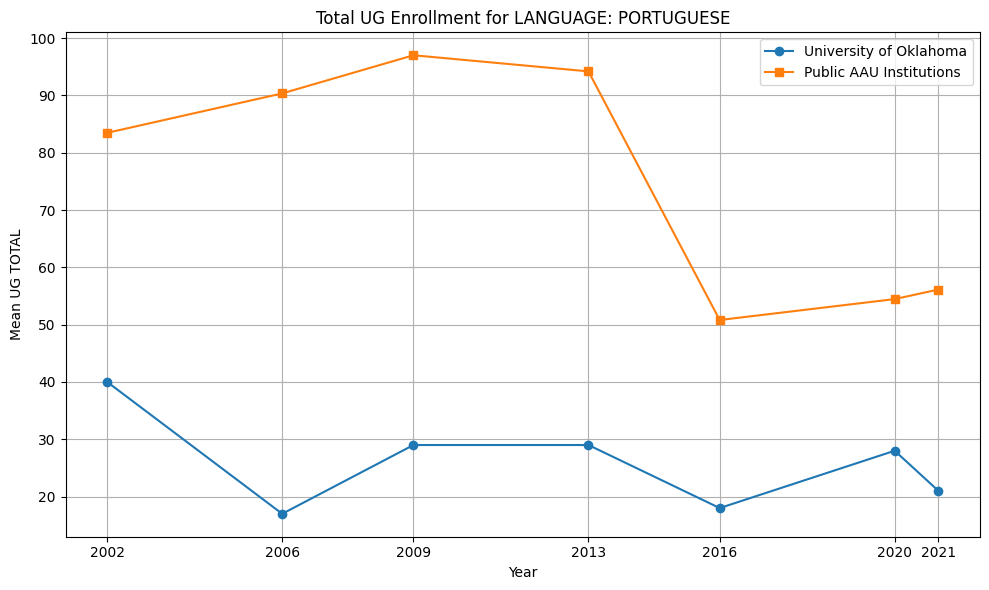

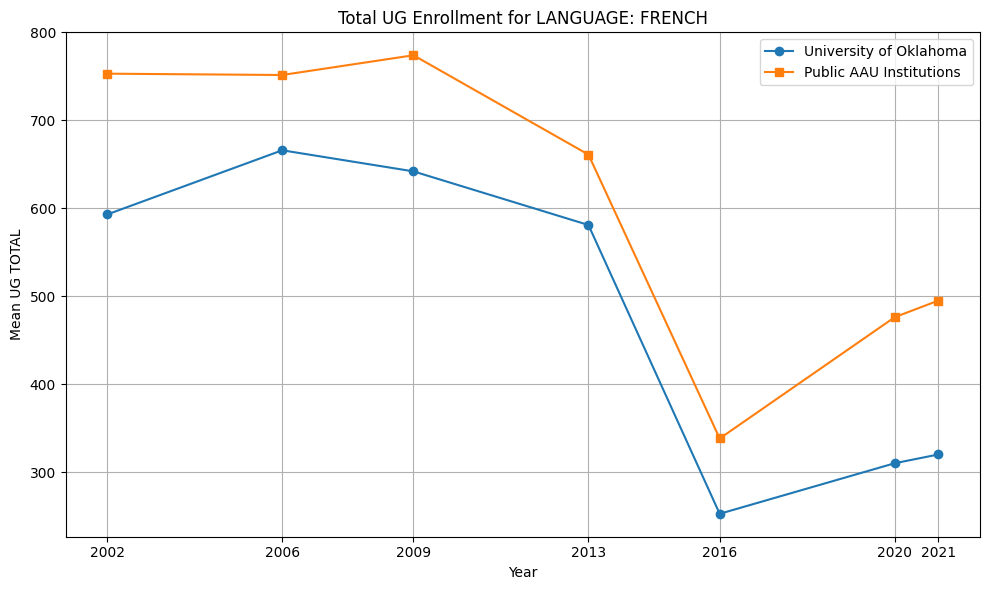

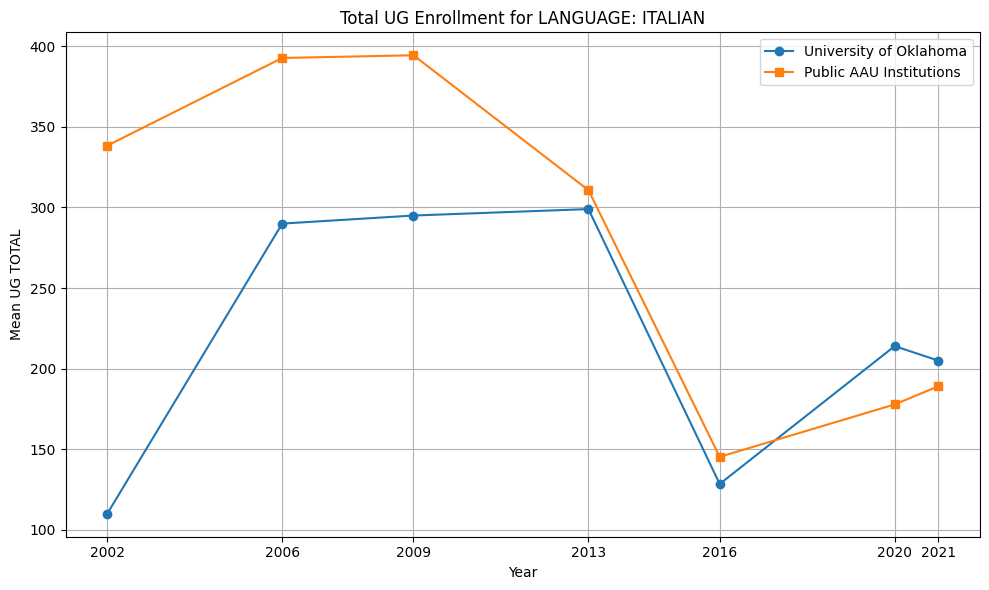

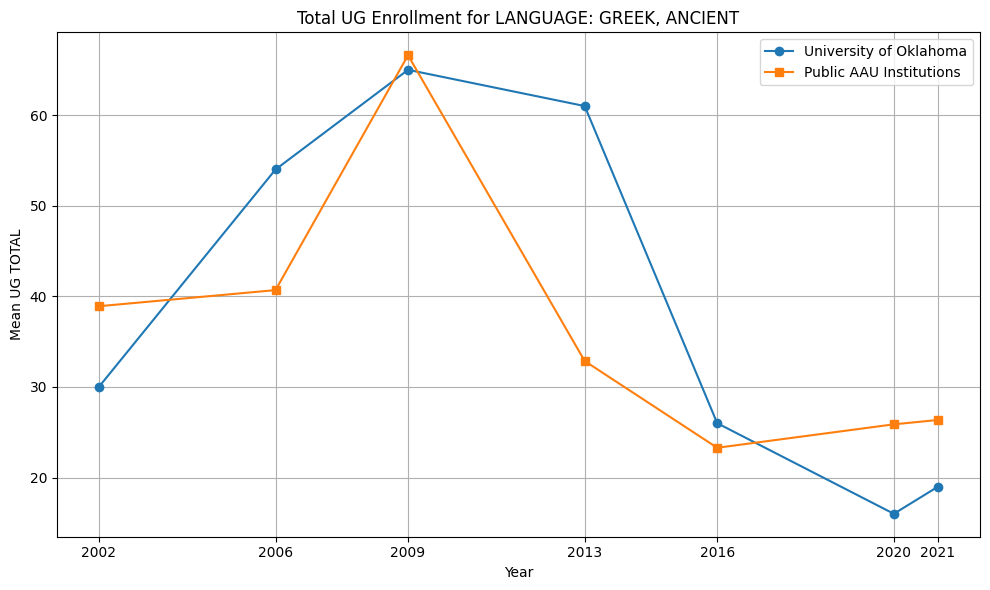

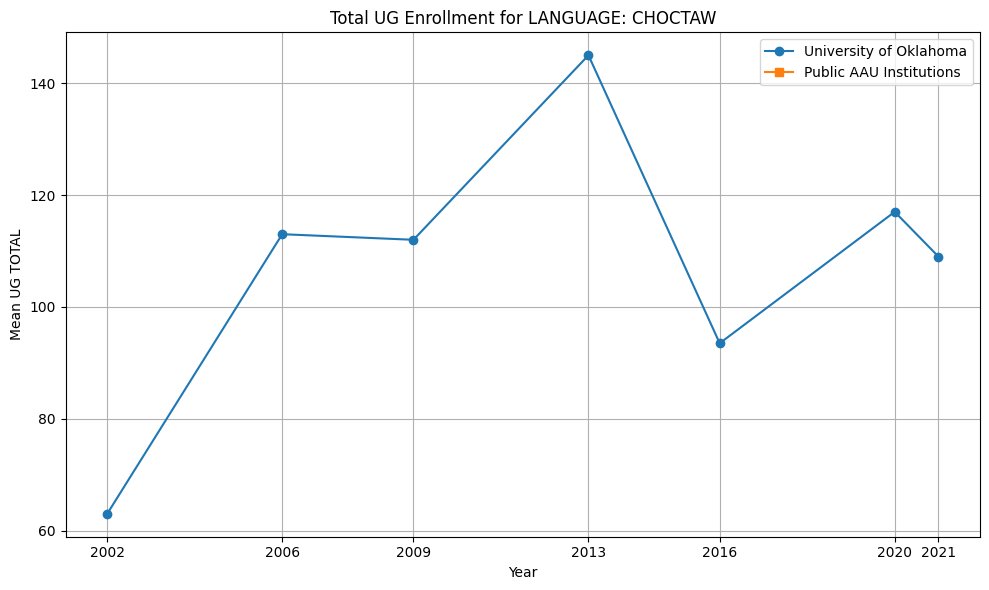

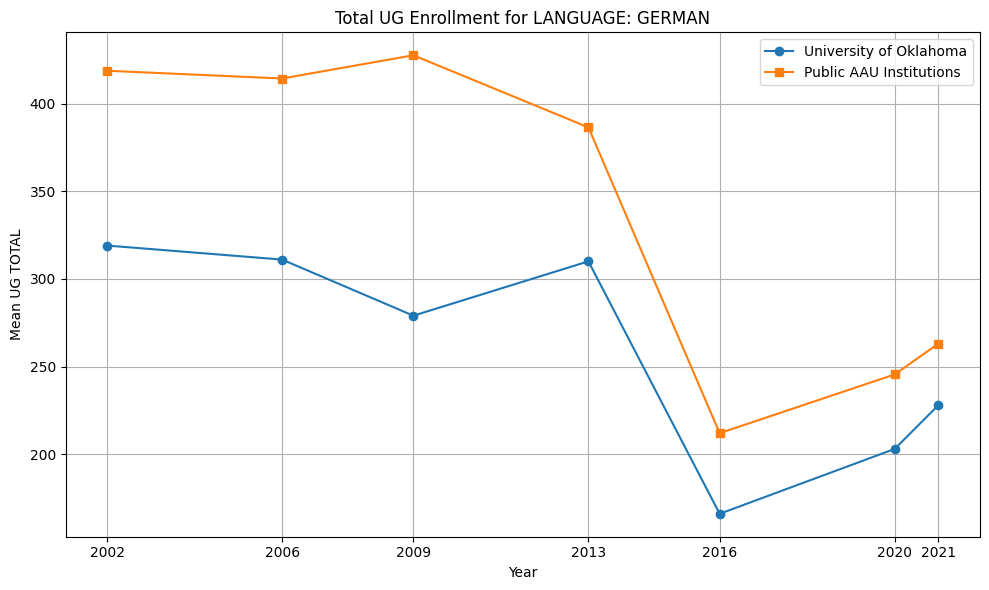

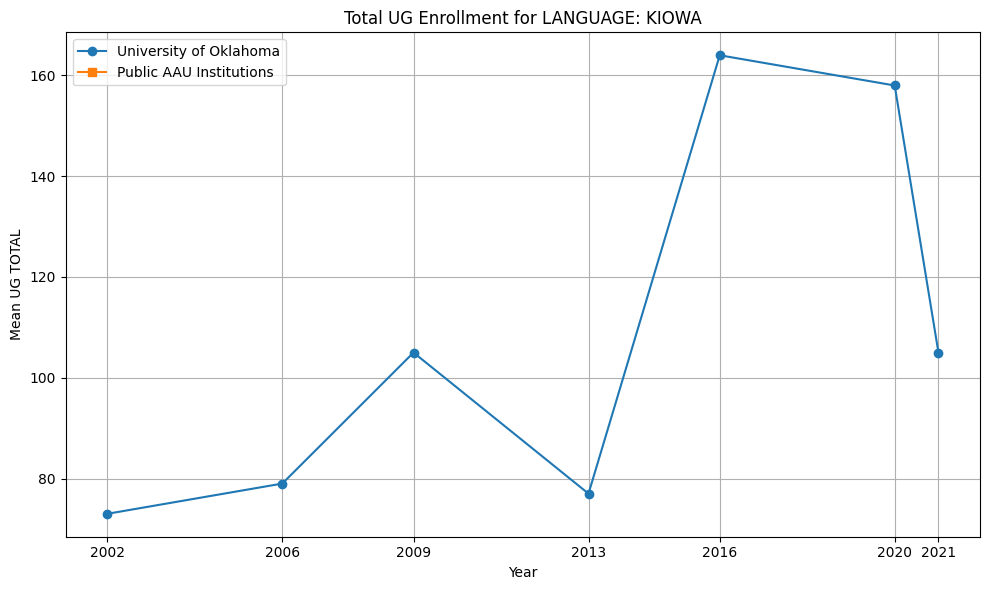

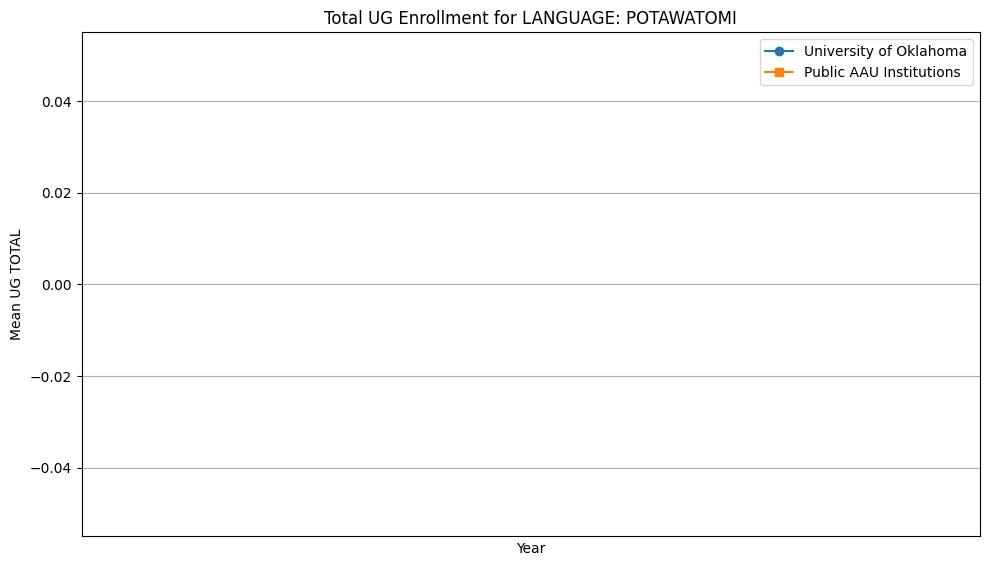

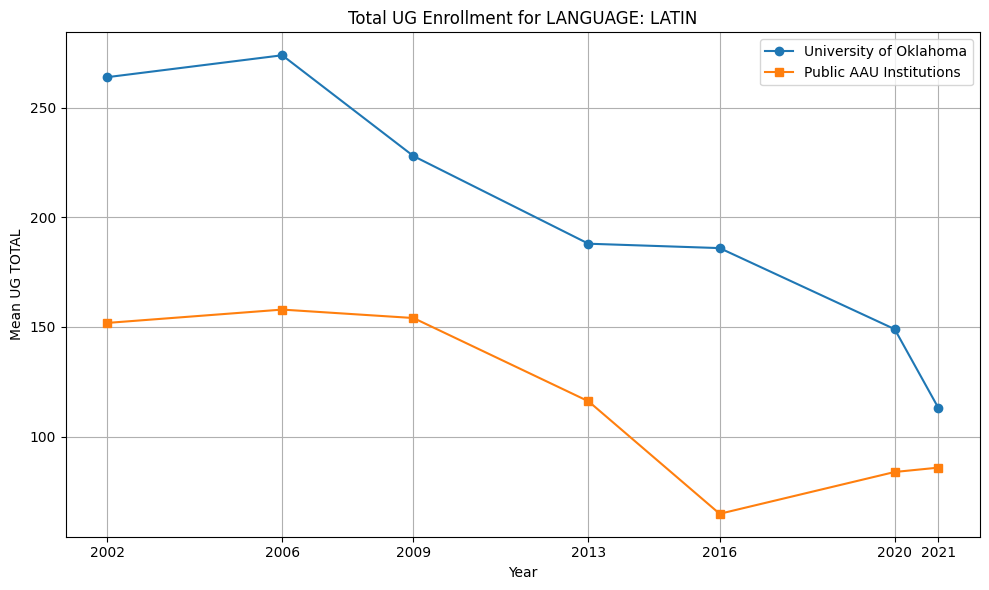

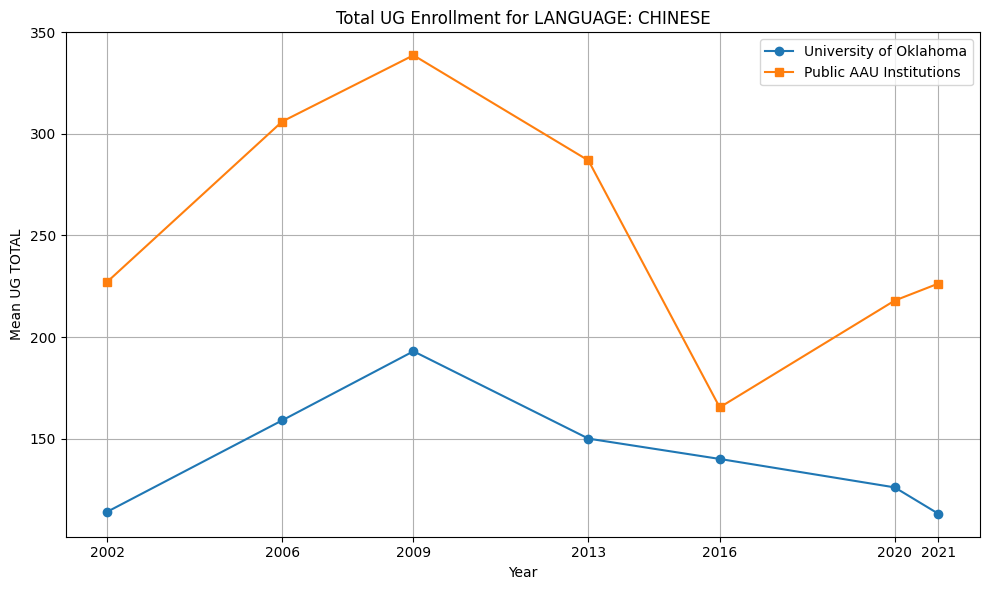

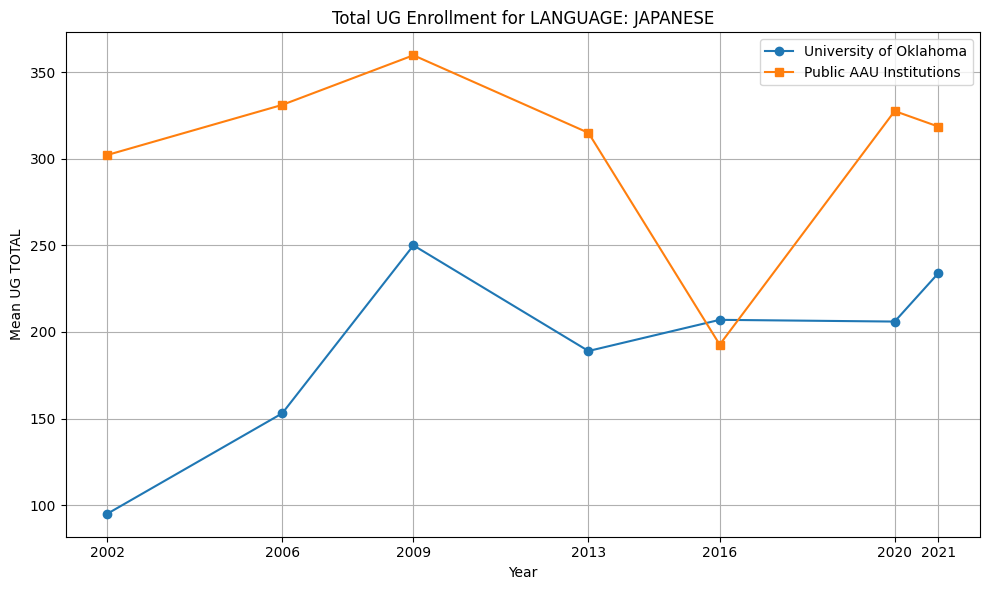

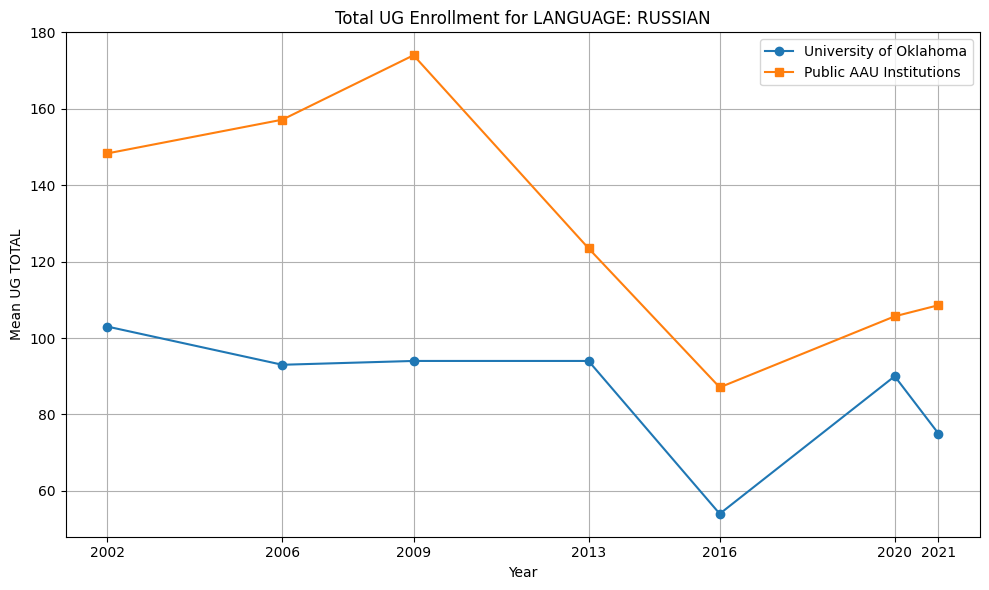

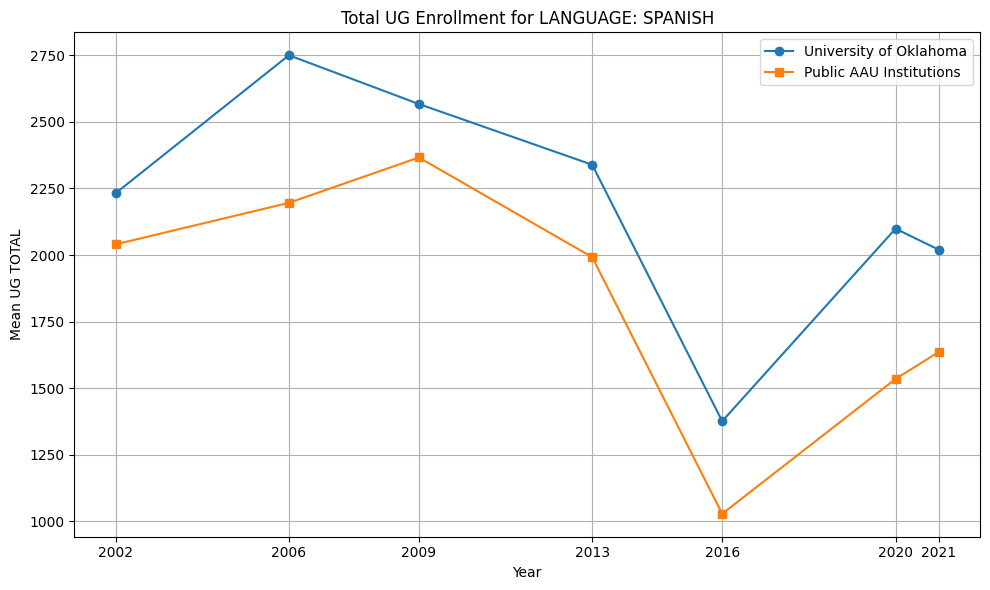

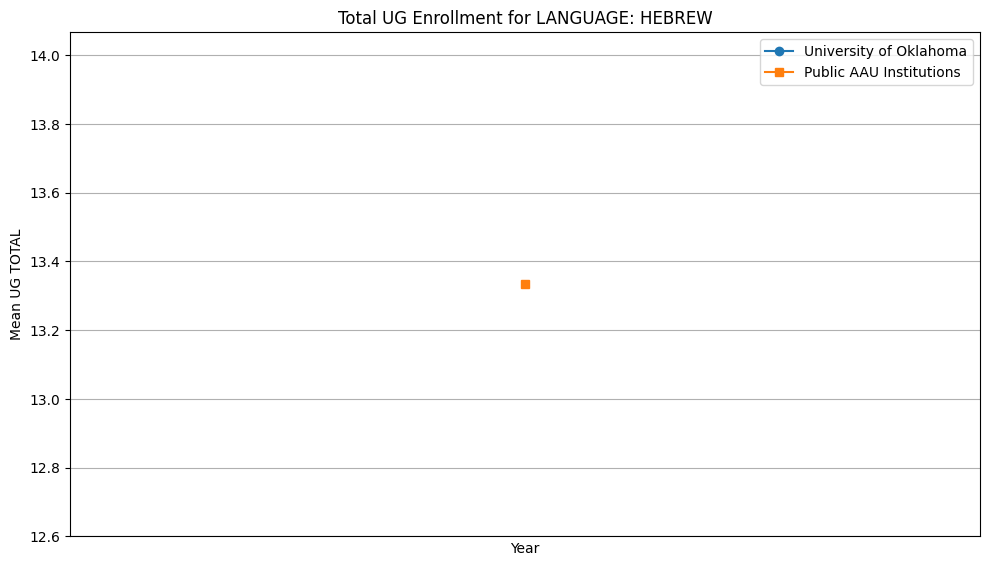

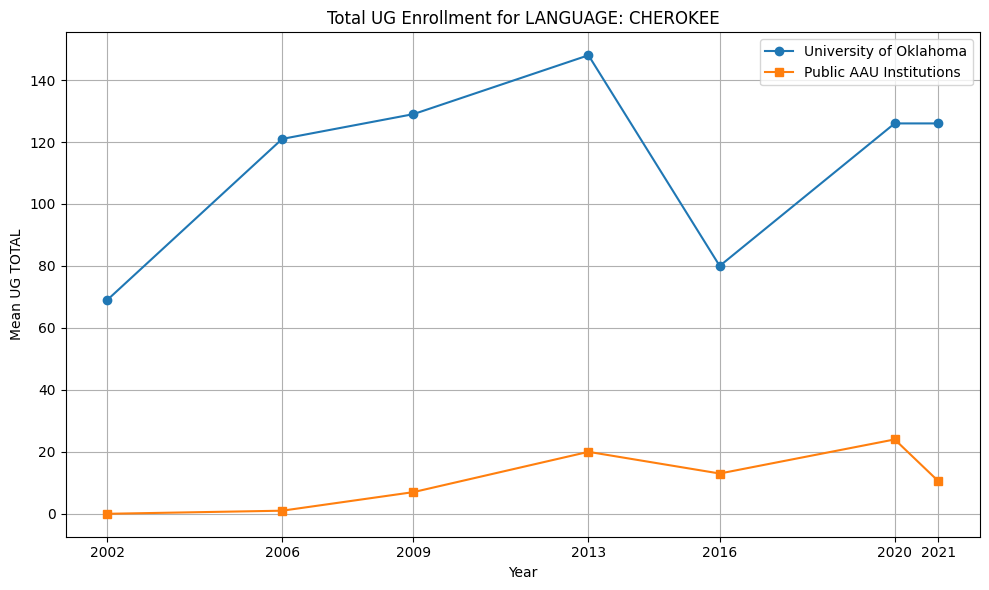

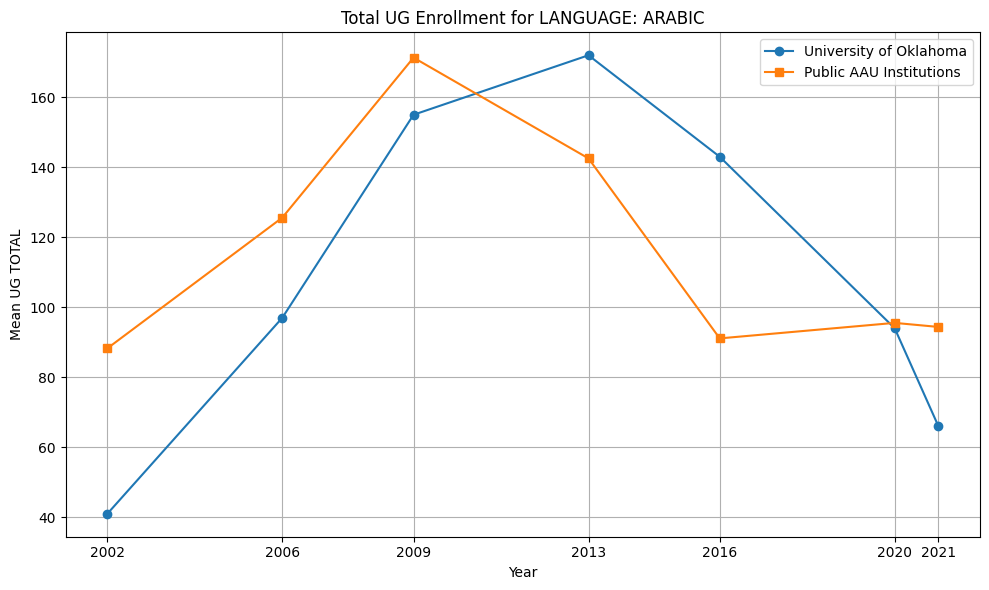

In [144]:
for language in lang_values:
    lang_compare(language)
    